## NLP

In [1]:
!pip install datasets
!pip install accelerate

In [2]:
import torch, accelerate
from transformers import AutoModelForSpeechSeq2Seq, AutoProcessor, pipeline
from datasets import load_dataset


device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

model_id = "openai/whisper-small"

model = AutoModelForSpeechSeq2Seq.from_pretrained(
    model_id, torch_dtype=torch_dtype, low_cpu_mem_usage=True, use_safetensors=True
)
model.to(device)

processor = AutoProcessor.from_pretrained(model_id)

pipe = pipeline(
    "automatic-speech-recognition",
    model=model,
    tokenizer=processor.tokenizer,
    feature_extractor=processor.feature_extractor,
    max_new_tokens=128,
    chunk_length_s=30,
    batch_size=16,
    return_timestamps=True,
    torch_dtype=torch_dtype,
    device=device,
)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.84k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.08k [00:00<?, ?B/s]

In [3]:
dataset = load_dataset("distil-whisper/librispeech_long", "clean", split="validation")

Generating validation split:   0%|          | 0/1 [00:00<?, ? examples/s]

In [6]:
sample = dataset[0]["audio"]
sample

{'path': '0d38672e0bbdbdc460af55b8bb84a15b2730db2819f2af64f9c777d4d586f2de',
 'array': array([0.00238037, 0.0020752 , 0.00198364, ..., 0.00024414, 0.00048828,
        0.0005188 ]),
 'sampling_rate': 16000}

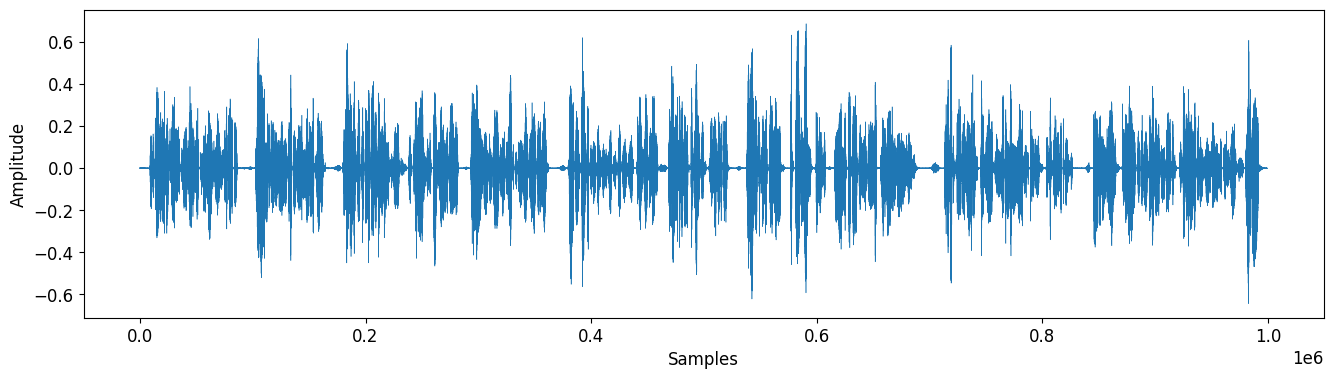

In [7]:
# Enable inline plotting in Jupyter Notebooks
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

# Update the font size of axes ticks and labels for better visibility
matplotlib.rcParams.update({'font.size': 12})

# Create a new figure
fig = plt.figure(figsize=(16, 4))
duration = len(sample['array']) / sample['array']['sampling_rate']

# Plot the audio signal with a thin linewidth
plt.plot(np.linspace(0, duration, len(sample['array'])), sample['array'], linewidth=0.4)
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.show()

In [ ]:
result = pipe(sample)
print(result["text"])